In [54]:
import math
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
import mplfinance as mplf
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.layers import Dropout
from keras import regularizers

In [55]:
data = pdr.get_data_yahoo('SHEL', start='2014-01-01', end='2022-12-17')
print(data)

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2014-01-02  71.199997  71.199997  70.565002  70.650002  42.465530  2152468
2014-01-03  71.110001  71.160004  70.730003  70.779999  42.543663  2130922
2014-01-06  70.540001  70.589996  70.279999  70.309998  42.261158  1701964
2014-01-07  70.860001  70.980003  70.610001  70.919998  42.627815  1775608
2014-01-08  70.650002  70.774002  70.279999  70.410004  42.321270  3136789
...               ...        ...        ...        ...        ...      ...
2022-12-12  56.060001  56.564999  55.880001  56.360001  55.312965  4491861
2022-12-13  57.369999  57.744999  57.150002  57.380001  56.314018  5091499
2022-12-14  57.380001  57.480000  56.540001  56.759998  55.705536  4325588
2022-12-15  56.759998  56.900002  55.779999  56.150002  55.106869  6087661
2022-12-16  54.939999  55.25999

In [56]:
df=data
df.shape

(2257, 6)

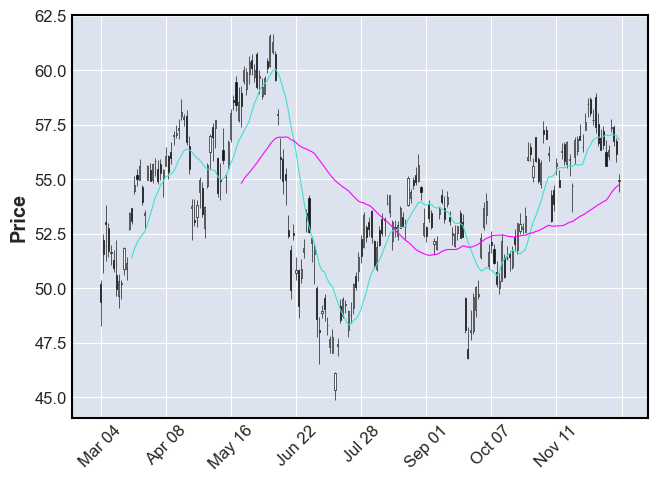

In [57]:
#رسم نمودار براساس کندل که 200 روز آخر رو نشون می ده
mplf.plot(df[-200:], type='candle', mav=(13, 55))
plt.show()

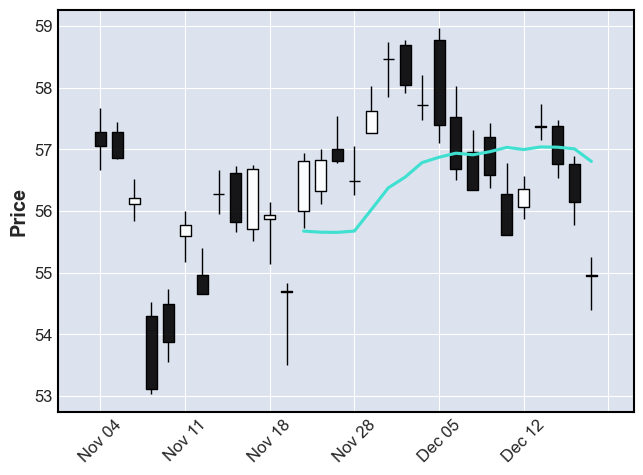

In [58]:
#رسم نمودار براساس کندل که 30 روز آخر رو نشون می ده
mplf.plot(df[-30:], type='candle', mav=(13, 55))
plt.show()

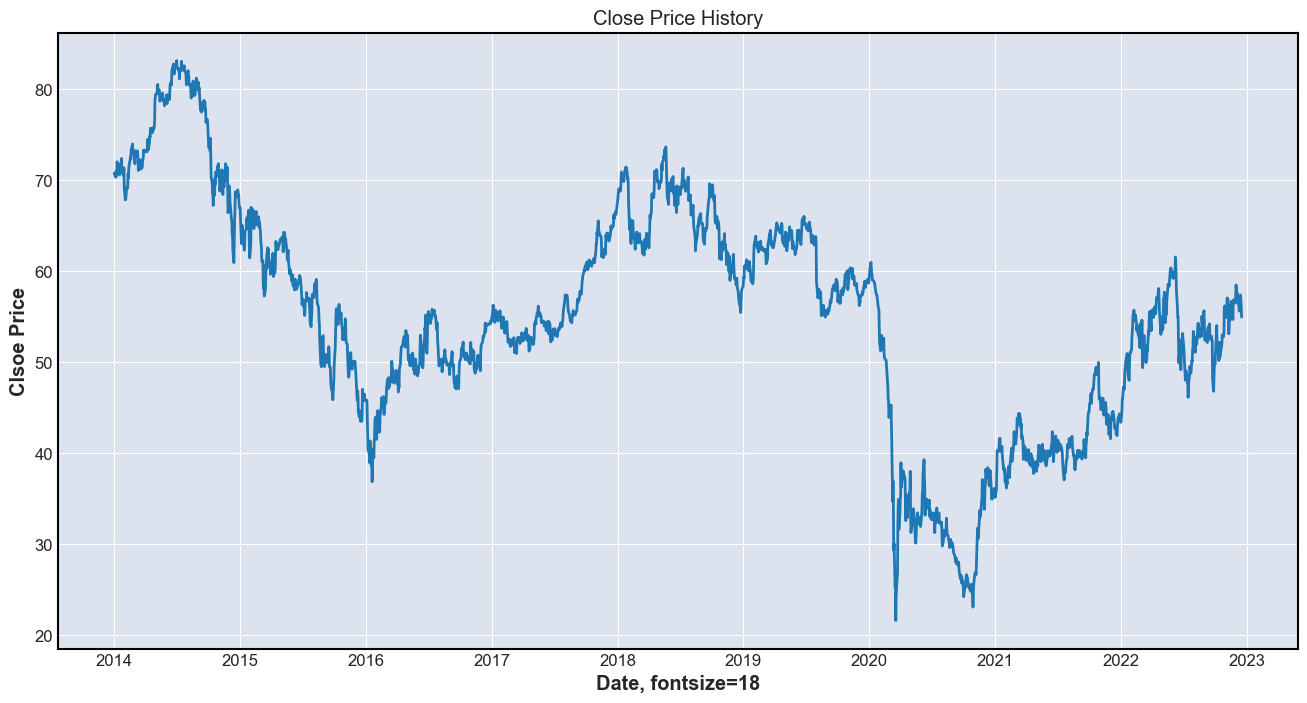

In [59]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date, fontsize=18')
plt.ylabel('Clsoe Price')
plt.show()

# Preprocessing Data

In [60]:
# creat the 'Close Cloumn'
data=df.filter(['Close'])

# convert to numpy
dataset=data.values
print(dataset.shape)

# the number of rows to be trained
training_data_len= math.ceil(len(dataset)*.8)
training_data_len

(2257, 1)


1806

In [61]:
#در اینجا پایین ترین قیمت  و بالاترین قیمت را در نظر گرفتم و کاهش پراکندگی را در این دو بازه بررسی کردم


#scalar=MinMaxScaler(feature_range=(min_range,max_range))
scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=scalar.fit_transform(dataset)


In [62]:
scaled_data

array([[0.79723576],
       [0.79934954],
       [0.79170724],
       ...,
       [0.57138206],
       [0.56146341],
       [0.54211378]])

In [63]:
scaled_data.shape

(2257, 1)

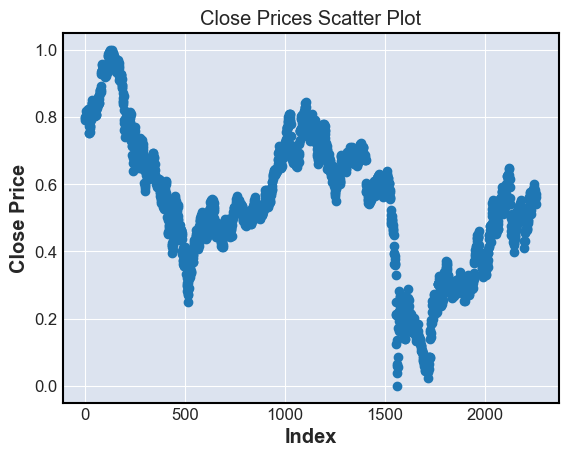

In [64]:

# Create a scatter plot of the close prices
plt.scatter(range(len(dataset)), scaled_data)
plt.title('Close Prices Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.show()

In [65]:
# creat scaled data for training

train_data=scaled_data[0:training_data_len,:]

# split data to x_train , x_test
x_train=[]
y_train=[]


#دادهای 30 روز پیش را بررسی می کنیم
#x_train= Data haye roz 0 ta 29
#y_train= faghat data haye roze 30
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [66]:
#convert  the x_train , y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [67]:
x_train.shape

(1746, 60)

In [68]:
y_train.shape

(1746,)

In [70]:
#Reshape the data
#باید به مدلی تعریف کنیم که مدل بتواند آنرا بخواند واسه همین از ریشیپ استفاده کردیم
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1746, 60, 1)

In [34]:
#Build the New LSTM model with 5 layer
model=Sequential()

model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(16))
model.add(Dropout(0.2))

model.add(Dense(1))

In [74]:
# # Compile the model
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.001, clipvalue=1.0)  # Adjust learning rate and clipvalue as needed
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [36]:
#model.compile(optimizer='adam', loss='mean_squared_error')

In [75]:
#model.fit(x_train, y_train, batch_size=1, epochs=1)  # Increase the number of epochs
model.fit(x_train, y_train, batch_size=32, epochs=10)  # Adjust batch size and epochs as needed


Epoch 1/10
55/55 [==============================] - 10s 87ms/step - loss: 0.0078
Epoch 2/10
55/55 [==============================] - 5s 87ms/step - loss: 0.0063
Epoch 3/10
55/55 [==============================] - 5s 87ms/step - loss: 0.0059
Epoch 4/10
55/55 [==============================] - 5s 87ms/step - loss: 0.0054
Epoch 5/10
55/55 [==============================] - 5s 87ms/step - loss: 0.0050
Epoch 6/10
55/55 [==============================] - 5s 87ms/step - loss: 0.0046
Epoch 7/10
55/55 [==============================] - 5s 87ms/step - loss: 0.0048
Epoch 8/10
55/55 [==============================] - 5s 86ms/step - loss: 0.0042
Epoch 9/10
55/55 [==============================] - 5s 84ms/step - loss: 0.0042
Epoch 10/10
55/55 [==============================] - 5s 84ms/step - loss: 0.0038


# Test & Predict

In [76]:
# Creating the testing dataset

test_data=scaled_data[training_data_len-60:,:] #از 
print(len(test_data))
x_test=[] 
y_test=dataset[training_data_len:,:]
print(len(test_data))
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

511
511


In [77]:
#convert x_test to numpy arrays
x_test=np.array(x_test)

In [78]:
# Reshape x_test

x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [79]:
# Prediction
predictions=model.predict(x_test)
predictions=scalar.inverse_transform(predictions) #

15/15 [==============================] - 2s 36ms/step


In [81]:
# The root mean squared error
#rmse=np.sqrt(np.mean((predictions-y_test)**2))
# The root mean squared error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

#rmse = np.sqrt(mean_squared_error(y_test, predictions))


0.02006361595542891

C:\Users\admin\AppData\Local\Temp\ipykernel_7828\1961955217.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


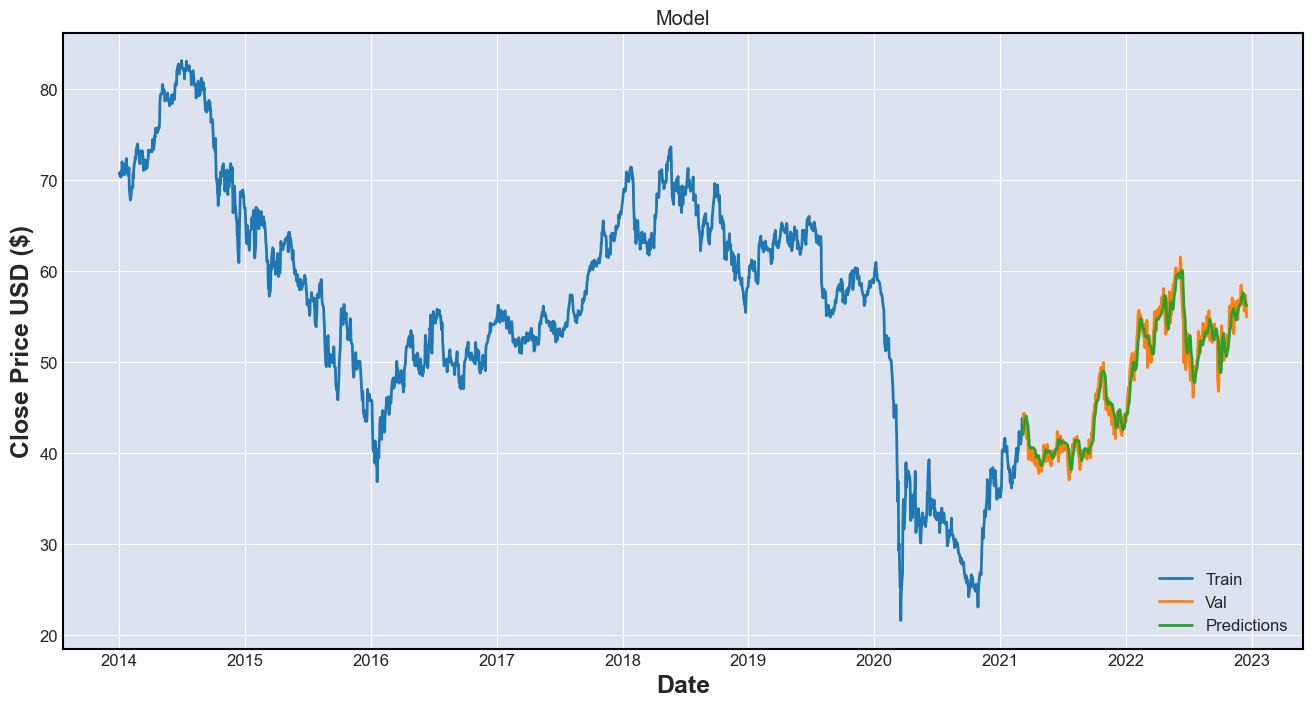

In [82]:
#Plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)' , fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [83]:
# Show the valid and predicted prices
aapl = pdr.get_data_yahoo('AAPL', start='2012-01-01', end='2019-12-17')

# Create a new data frame
new_df=aapl.filter(['Close'])valid

SyntaxError: invalid syntax (3906732447.py, line 5)

In [ ]:
She1 = pdr.get_data_yahoo('SHEL', start='2014-01-01', end='2022-12-17')


# Create a new data frame
new_df=df.filter(['Close'])


# Get the last 60 day Closing price values and convert the dataframe to an array

last_60_days=new_df[-60:].values


# Scale the data to be values between 0 and 1

last_60_days_scaled=scalar.transform(last_60_days)
  
# Create an empty list

X_test=[]

X_test.append(last_60_days_scaled)

# Convert the numpy array

X_test=np.array(X_test)

# Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_price=model.predict(X_test)

# Get the predicted scalar price
pred_price=scalar.inverse_transform(pred_price)
print(pred_price)


In [84]:
she2= pdr.get_data_yahoo('SHEL', start='2014-01-01', end='2022-12-17')
print(she2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2014-01-02    70.650002
2014-01-03    70.779999
2014-01-06    70.309998
2014-01-07    70.919998
2014-01-08    70.410004
                ...    
2022-12-12    56.360001
2022-12-13    57.380001
2022-12-14    56.759998
2022-12-15    56.150002
2022-12-16    54.959999
Name: Close, Length: 2257, dtype: float64


# Moving Average & Exponential Moving Average(EMA)

In [85]:
# Create a function for calculation Moving Average(MA)
def MA(data,period=30,column='Close'):
  return data[column].rolling(window=period).mean()

In [86]:
# Create a function for calculation Exponential Moving Average(EMA)
def EMA(data,period=30,column='Close'):
  return data[column].ewm(span=period).mean()

In [87]:
# Create two new columns for storing the new MA periods
df['MA10'] = MA(df, 10)  # Calculating 10-day MA
df['MA100'] = MA(df, 100)  # Calculating 100-day MA

# Create two new columns for storing the new EMA periods
df['EMA10'] = EMA(df, 10)  # Calculating 10-day EMA
df['EMA100'] = EMA(df, 100)  # Calculating 100-day EMA

In [88]:
# Get the buy and sell signals based on the new MA periods
df['Signal2'] = np.where(df['MA10'] > df['MA100'], 1, 0)
df['Position2'] = df['Signal2'].diff()

df['Buy2'] = np.where(df['Position2'] == 1, df['Close'], np.nan)
df['Sell2'] = np.where(df['Position2'] == -1, df['Close'], np.nan)


In [89]:
# Get the buy and sell signals based on the new MA periods
df['Signal2'] = np.where(df['EMA10'] > df['EMA100'], 1, 0)
df['Position2'] = df['Signal2'].diff()

df['Buy2'] = np.where(df['Position2'] == 1, df['Close'], np.nan)
df['Sell2'] = np.where(df['Position2'] == -1, df['Close'], np.nan)

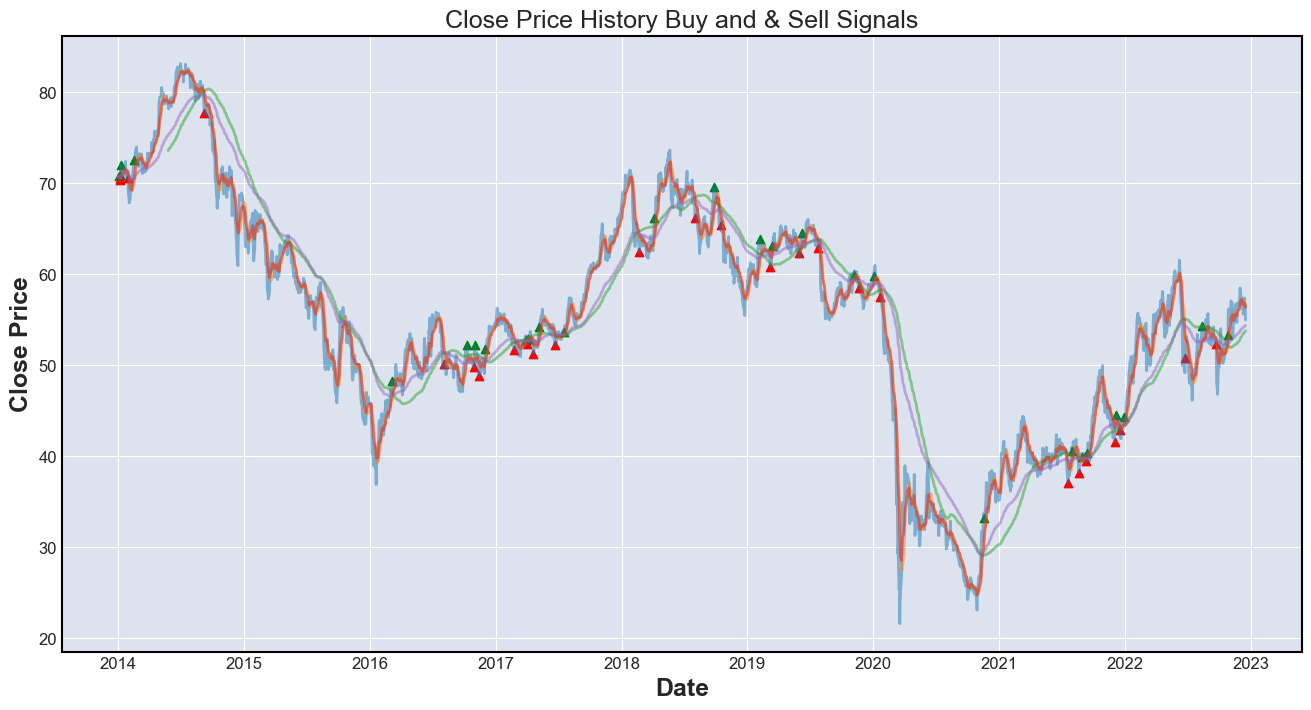

In [90]:
#Show the Close price with the MA ,WMA,EMA and Buy and Sell signals
plt.figure(figsize=(16,8))
plt.title('Close Price History Buy and & Sell Signals' , fontsize=18)
plt.plot(df['Close'], alpha=0.5 , label='Close')
plt.plot(df['MA10'], alpha=0.5 , label='MA10')
plt.plot(df['MA100'], alpha=0.5 , label='MA100')
plt.plot(df['EMA10'], alpha=0.5 , label='EMA10')
plt.plot(df['EMA100'], alpha=0.5 , label='EMA100')


plt.scatter(df.index,df['Buy2'], alpha=1, label='Buy Signal', marker='^',color='green')

plt.scatter(df.index,df['Sell2'], alpha=1, label='Sell Signal', marker='^',color='red')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()